In [17]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import math


mu, sigma = 0, 1 # mean and standard deviation
particlesAxisX = [-100, 100]
particlesAxisY = [-100, 100]
msodAxisX = [0,1010]
msodAxisY = [0,8000]

epochs = 1000
amount_particles = 500

In [18]:

### Graph
def initGraphs():
    ax = fig.add_subplot(1, 2, 1)
    drawLabels(ax,0)

    axMsod = fig.add_subplot(1, 2, 2)
    drawMsodLabels(axMsod)

    plt.subplots_adjust(bottom=0.25, top=0.75, wspace=0.5, hspace=0.5)
    fig.show()
    return ax, axMsod

def drawMsodLabels(axMsod):
    axMsod.set_xlim(msodAxisX)
    axMsod.set_ylim(msodAxisY)
    axMsod.set_xlabel('Time steps')
    axMsod.set_ylabel('Mean square of displacement')
    axMsod.set_title('Visualization of relationship between mean square \nof displacement and time.')

def drawLabels(ax, epoch):
    ax.set_xlim(particlesAxisX)
    ax.set_ylim(particlesAxisY)
    ax.set_xlabel('Particle x coordinate')
    ax.set_ylabel('Particle y coordinate')
    ax.set_title('2D Brownian trajectory for '+str(amount_particles)+' particles \nin time step '+str(epoch)+".")

def plotParticles(particles, ax):
    ax.cla()
    drawLabels(ax,particles[0].epoch)
    ax.plot(map(lambda m: m.x, particles),map(lambda m: m.y, particles),"ro",markersize=1)

def plotParticlesColors(particles,ax):
    ax.cla()
    drawLabels(ax,particles[0].epoch)
    for m in particles:
        ax.plot(m.x,m.y,m.color+"o",markersize=1)
#         ax.plot([m.bx,m.x],[m.by,m.y],m.color+'o--',markersize=1,linewidth=1)

def plotMsod(epoch,msod,ax):
    ax.plot(epoch,msod,"bo",markersize=1)


### Calculations
class Particles:
    def __init__(self, x, y, color):
        self.x = x
        self.y = y
        self.bx = x
        self.by = y
        self.color = color
        self.epoch = 0
        self.squareFullDistance = 0

    def __str__(self):
        return "Particles ("+str(self.x)+","+str(self.y)+") "+str(self.color)+", epoch: "+str(self.epoch)

    def move(self, coordinates):
        self.bx = self.x
        self.by = self.y
        self.x += coordinates[0]
        self.y += coordinates[1]
        self.epoch += 1
        self.squareFullDistance = self.x*self.x + self.y*self.y

def meanSquareOfDisplacement(movementPerTimeUnit, squareDistance, time):
    return movementPerTimeUnit * squareDistance * time

def calculateMsod(particles):
    avr = sum(map(lambda m: m.squareFullDistance, particles))
    return meanSquareOfDisplacement(1,avr/len(particles),1)

def randomCoordinates():
    return np.random.normal(mu, sigma, 2)

def setInitCoordinatesZeros(amount_particles,colors):
    particles = []
    for i in range(0,amount_particles):
        particles.append(Particles(0,0,colors[i%len(colors)]))
    return particles

def setInitCoordinates(amount_particles,axis,border,colors):
    particles = []
    if amount_particles == 1:
        particles.append(Particles(0,0,colors[0]))
        return particles

    for i in range(0,amount_particles):
        s_amount = (math.sqrt(amount_particles))

        offset = (axis*2 - border*2) / s_amount

        x = -axis+border+offset*(i/s_amount)
        y = -axis+border+offset*(i%s_amount)
        particles.append(Particles(x,y,colors[i%len(colors)]))
    return particles


### Run methods
def runAll(particles,epochs,ax,axMsod):
    for i in range(0,epochs):
        for m in particles:
            m.move(randomCoordinates())

        plotParticles(particles,ax)
        plotMsod(particles[0].epoch,calculateMsod(particles),axMsod)
        fig.canvas.draw()

def runAllColors(particles,epochs,ax,axMsod):
     for i in range(0,epochs):
        for m in particles:
            m.move(randomCoordinates())

        plotParticlesColors(particles,ax)
        plotMsod(particles[0].epoch,calculateMsod(particles),axMsod)
        fig.canvas.draw()

In [19]:
axis = 100
border=40
colors = ['b','g','r','c','m','y','k','w']

<IPython.core.display.Javascript object>


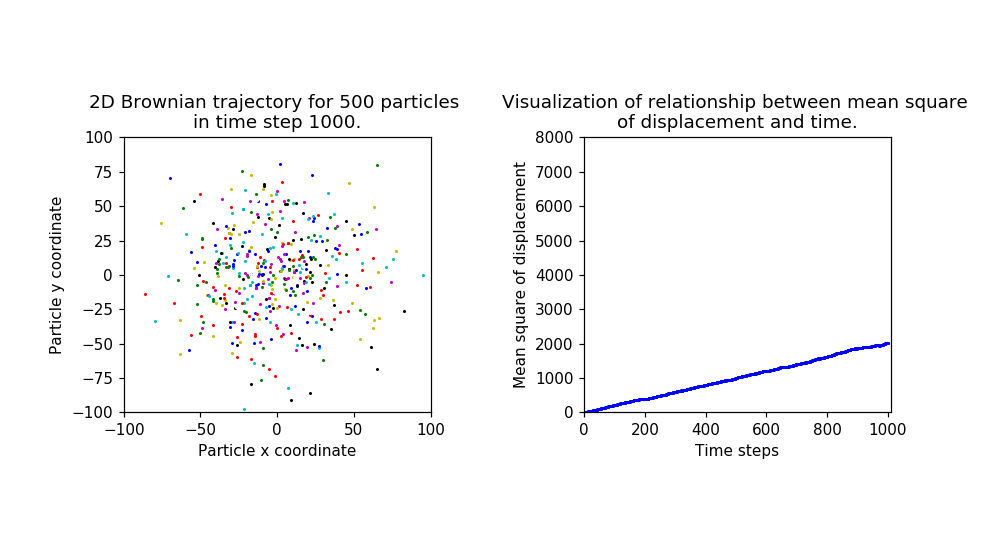

In [20]:
fig = plt.figure(figsize=(9, 5))
ax, axMsod = initGraphs()


# particles = setInitCoordinates(amount_particles,axis,border,colors)
particles = setInitCoordinatesZeros(amount_particles,colors)

# runAll(particles,epochs,ax,axMsod)
runAllColors(particles,epochs,ax,axMsod)